In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [85]:
df = pd.read_excel('индекс-дефлятр.xlsx')
df

,Year,Scope_of_work_construction,Physical_volume_index_construction,Index_cost,Index_cost_live_first,Index_cost_live_second,Deflator_index_construction,cours_dollar,stavka_tsb,temp_infl
0,1998,3535.7,NaN,NaN,156.90,191.3,NaN,9.7945,150.00,84.4
1,1999,3632.3,72.5,NaN,146.30,129.6,71.947612,24.6489,55.00,36.5
2,2000,5726.6,101.3,NaN,113.10,116.3,66.471972,28.1287,25.00,20.2
3,2001,9008.7,131.1,119.90,125.10,132.0,83.795515,29.1753,21.00,18.6
4,2002,9613.7,93.5,115.54,122.50,125.3,78.149771,31.3608,18.00,15.1
5,2003,12392.7,100.2,110.71,118.80,118.8,81.632653,30.6719,16.00,12.0
6,2004,22818.1,159.6,109.80,118.50,124.1,80.376692,28.8080,13.00,10.9
7,2005,38716.9,151.4,111.84,117.50,118.0,84.030609,28.1910,12.00,10.9
8,2006,54451.3,122.5,111.48,147.70,154.4,81.413295,27.1355,11.00,9.0
9,2007,69073.6,108.5,108.89,123.40,120.6,69.276726,25.5808,10.00,9.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                26 non-null     int64  
 1   Scope_of_work_construction          26 non-null     float64
 2   Physical_volume_index_construction  25 non-null     float64
 3   Index_cost                          23 non-null     float64
 4   Index_cost_live_first               26 non-null     float64
 5   Index_cost_live_second              26 non-null     float64
 6   Deflator_index_construction         25 non-null     float64
 7   cours_dollar                        26 non-null     float64
 8   stavka_tsb                          26 non-null     float64
 9   temp_infl                           26 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.2 KB


In [87]:
df.replace({',': '.'}, regex=True, inplace=True)
df

,Year,Scope_of_work_construction,Physical_volume_index_construction,Index_cost,Index_cost_live_first,Index_cost_live_second,Deflator_index_construction,cours_dollar,stavka_tsb,temp_infl
0,1998,3535.7,NaN,NaN,156.90,191.3,NaN,9.7945,150.00,84.4
1,1999,3632.3,72.5,NaN,146.30,129.6,71.947612,24.6489,55.00,36.5
2,2000,5726.6,101.3,NaN,113.10,116.3,66.471972,28.1287,25.00,20.2
3,2001,9008.7,131.1,119.90,125.10,132.0,83.795515,29.1753,21.00,18.6
4,2002,9613.7,93.5,115.54,122.50,125.3,78.149771,31.3608,18.00,15.1
5,2003,12392.7,100.2,110.71,118.80,118.8,81.632653,30.6719,16.00,12.0
6,2004,22818.1,159.6,109.80,118.50,124.1,80.376692,28.8080,13.00,10.9
7,2005,38716.9,151.4,111.84,117.50,118.0,84.030609,28.1910,12.00,10.9
8,2006,54451.3,122.5,111.48,147.70,154.4,81.413295,27.1355,11.00,9.0
9,2007,69073.6,108.5,108.89,123.40,120.6,69.276726,25.5808,10.00,9.0


In [88]:
df.drop(['Year'], axis=1, inplace=True)
df

,Scope_of_work_construction,Physical_volume_index_construction,Index_cost,Index_cost_live_first,Index_cost_live_second,Deflator_index_construction,cours_dollar,stavka_tsb,temp_infl
0,3535.7,NaN,NaN,156.90,191.3,NaN,9.7945,150.00,84.4
1,3632.3,72.5,NaN,146.30,129.6,71.947612,24.6489,55.00,36.5
2,5726.6,101.3,NaN,113.10,116.3,66.471972,28.1287,25.00,20.2
3,9008.7,131.1,119.90,125.10,132.0,83.795515,29.1753,21.00,18.6
4,9613.7,93.5,115.54,122.50,125.3,78.149771,31.3608,18.00,15.1
5,12392.7,100.2,110.71,118.80,118.8,81.632653,30.6719,16.00,12.0
6,22818.1,159.6,109.80,118.50,124.1,80.376692,28.8080,13.00,10.9
7,38716.9,151.4,111.84,117.50,118.0,84.030609,28.1910,12.00,10.9
8,54451.3,122.5,111.48,147.70,154.4,81.413295,27.1355,11.00,9.0
9,69073.6,108.5,108.89,123.40,120.6,69.276726,25.5808,10.00,9.0


In [89]:
imputer = KNNImputer(n_neighbors=5)  
filled_data = imputer.fit_transform(df)

In [90]:
df_filled = pd.DataFrame(filled_data, columns=df.columns)
df_filled

,Scope_of_work_construction,Physical_volume_index_construction,Index_cost,Index_cost_live_first,Index_cost_live_second,Deflator_index_construction,cours_dollar,stavka_tsb,temp_infl
0,3535.7,99.72,113.558,156.90,191.3,76.399504,9.7945,150.00,84.4
1,3632.3,72.50,113.558,146.30,129.6,71.947612,24.6489,55.00,36.5
2,5726.6,101.30,113.558,113.10,116.3,66.471972,28.1287,25.00,20.2
3,9008.7,131.10,119.900,125.10,132.0,83.795515,29.1753,21.00,18.6
4,9613.7,93.50,115.540,122.50,125.3,78.149771,31.3608,18.00,15.1
5,12392.7,100.20,110.710,118.80,118.8,81.632653,30.6719,16.00,12.0
6,22818.1,159.60,109.800,118.50,124.1,80.376692,28.8080,13.00,10.9
7,38716.9,151.40,111.840,117.50,118.0,84.030609,28.1910,12.00,10.9
8,54451.3,122.50,111.480,147.70,154.4,81.413295,27.1355,11.00,9.0
9,69073.6,108.50,108.890,123.40,120.6,69.276726,25.5808,10.00,9.0


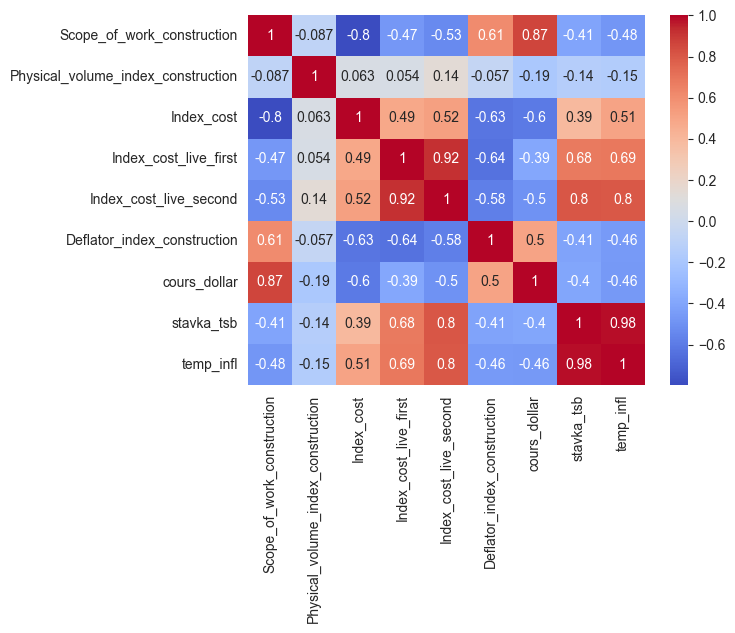

In [91]:
sns.heatmap(df_filled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [92]:
k = 7

corrmat = df_filled.corr()
cols = corrmat.nlargest(k, 'Deflator_index_construction')['Deflator_index_construction']
cols

Deflator_index_construction           1.000000
Scope_of_work_construction            0.610986
cours_dollar                          0.504848
Physical_volume_index_construction   -0.057152
stavka_tsb                           -0.411512
temp_infl                            -0.458354
Index_cost_live_second               -0.583531
Name: Deflator_index_construction, dtype: float64

In [93]:
df_filled[cols.index.to_list()]

,Deflator_index_construction,Scope_of_work_construction,cours_dollar,Physical_volume_index_construction,stavka_tsb,temp_infl,Index_cost_live_second
0,76.399504,3535.7,9.7945,99.72,150.00,84.4,191.3
1,71.947612,3632.3,24.6489,72.50,55.00,36.5,129.6
2,66.471972,5726.6,28.1287,101.30,25.00,20.2,116.3
3,83.795515,9008.7,29.1753,131.10,21.00,18.6,132.0
4,78.149771,9613.7,31.3608,93.50,18.00,15.1,125.3
5,81.632653,12392.7,30.6719,100.20,16.00,12.0,118.8
6,80.376692,22818.1,28.8080,159.60,13.00,10.9,124.1
7,84.030609,38716.9,28.1910,151.40,12.00,10.9,118.0
8,81.413295,54451.3,27.1355,122.50,11.00,9.0,154.4
9,69.276726,69073.6,25.5808,108.50,10.00,9.0,120.6


<Axes: >

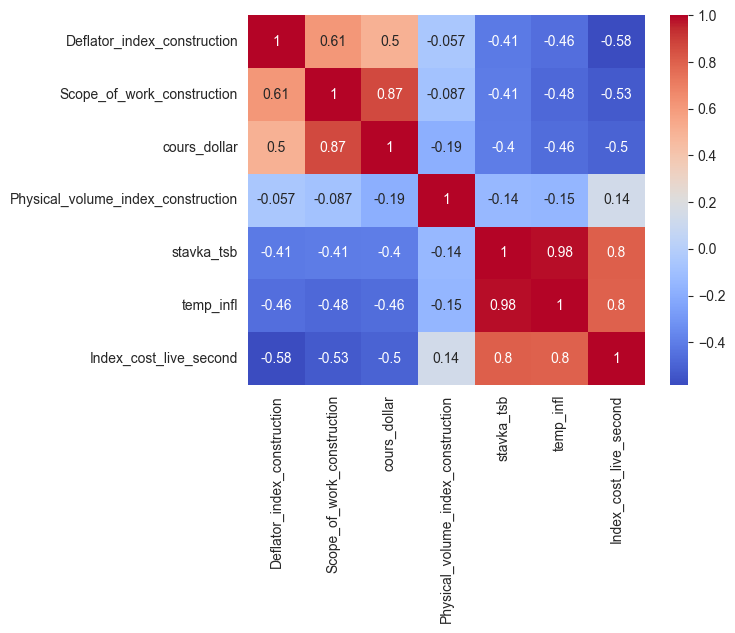

In [94]:
sns.heatmap(df_filled[cols.index.to_list()].corr(), cmap = 'coolwarm', annot = True)

In [95]:
df_test = df_filled[cols.index.to_list()]
df_test

,Deflator_index_construction,Scope_of_work_construction,cours_dollar,Physical_volume_index_construction,stavka_tsb,temp_infl,Index_cost_live_second
0,76.399504,3535.7,9.7945,99.72,150.00,84.4,191.3
1,71.947612,3632.3,24.6489,72.50,55.00,36.5,129.6
2,66.471972,5726.6,28.1287,101.30,25.00,20.2,116.3
3,83.795515,9008.7,29.1753,131.10,21.00,18.6,132.0
4,78.149771,9613.7,31.3608,93.50,18.00,15.1,125.3
5,81.632653,12392.7,30.6719,100.20,16.00,12.0,118.8
6,80.376692,22818.1,28.8080,159.60,13.00,10.9,124.1
7,84.030609,38716.9,28.1910,151.40,12.00,10.9,118.0
8,81.413295,54451.3,27.1355,122.50,11.00,9.0,154.4
9,69.276726,69073.6,25.5808,108.50,10.00,9.0,120.6


In [96]:
X= np.array(df_test.drop('Deflator_index_construction', axis=1))
Y= np.array(df_test['Deflator_index_construction'])

In [97]:
scaler = MinMaxScaler()
y_new = Y.reshape(-1,1)
y_scaled = scaler.fit_transform(y_new)
X_scaled = scaler.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 6)
(6, 6)
(20, 1)
(6, 1)


In [99]:
# Расширяем список значений для параметра alpha
grid_params_0 = {'alpha': np.arange(0.1, 10.1, 0.5).tolist()}  # Добавляем значения от 0.1 до 10.0 с шагом 0.5

# Создаем модель Ridge и настраиваем гиперпараметры с помощью GridSearchCV
RR = GridSearchCV(linear_model.Ridge(), param_grid=grid_params_0, scoring='neg_mean_absolute_error')
RR.fit(X_train, y_train)

# Выводим результаты
print(f"Минимальная средняя абсолютная ошибка = {RR.best_score_}")
print(f"Лучшие гиперпараметры = {RR.best_params_}")

Минимальная средняя абсолютная ошибка = -0.14122449483864222
Лучшие гиперпараметры = {'alpha': 0.1}


In [100]:
grid_params_l1 = {'alpha': np.arange(0.1, 10.1, 0.5).tolist()}  # Добавляем значения от 0.1 до 10.0 с шагом 0.5
LR = GridSearchCV(linear_model.Lasso(), param_grid=grid_params_l1, scoring = 'neg_mean_absolute_error')
LR.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={LR.best_score_}" )
print(f"Лучшие гиперпараметры = {LR.best_params_}")

Минимальная средняя абсолютная ошибка=-0.25244655013122486
Лучшие гиперпараметры = {'alpha': 0.1}


In [101]:
# Расширяем список значений для параметров alpha и l1_ratio
grid_params_EN_d = {
    'alpha': np.arange(0.1, 2.1, 0.1).tolist(),  # Добавляем значения от 0.1 до 2.0 с шагом 0.1
    'l1_ratio': np.arange(0.1, 1.0, 0.1).tolist()  # Добавляем значения от 0.1 до 0.9 с шагом 0.1
}
EN = GridSearchCV(ElasticNet(), param_grid=grid_params_EN_d, scoring = 'neg_mean_absolute_error')
EN.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={EN.best_score_}" )
print(f"Лучшие гиперпараметры = {EN.best_params_}")

Минимальная средняя абсолютная ошибка=-0.19083689410331336
Лучшие гиперпараметры = {'alpha': 0.1, 'l1_ratio': 0.1}


In [102]:
grid_params_DT_d = {'max_depth': [2, 5, 10, 20]}
DT = GridSearchCV(DecisionTreeRegressor(), param_grid=grid_params_DT_d, scoring = 'neg_mean_absolute_error')
DT.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={DT.best_score_}" )
print(f"Лучшие гиперпараметры = {DT.best_params_}")

Минимальная средняя абсолютная ошибка=-0.1322876141572388
Лучшие гиперпараметры = {'max_depth': 2}


In [103]:
grid_params_SVR_d = {'epsilon': [0.1, 0.4, 0.6, 0.8], 'C': [0.1, 1.5, 1.9]}
SVR = GridSearchCV(SVR(), param_grid=grid_params_SVR_d, scoring = 'neg_mean_absolute_error')
SVR.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={SVR.best_score_}" )
print(f"Лучшие гиперпараметры = {SVR.best_params_}")

Минимальная средняя абсолютная ошибка=-0.1548624001887621
Лучшие гиперпараметры = {'C': 1.5, 'epsilon': 0.1}


/Users/an.kornn/Library/Caches/pypoetry/virtualenvs/departmentgopro-Wf-ciL0h-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/an.kornn/Library/Caches/pypoetry/virtualenvs/departmentgopro-Wf-ciL0h-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/an.kornn/Library/Caches/pypoetry/virtualenvs/departmentgopro-Wf-ciL0h-py3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

In [104]:
grid_params_1={'n_neighbors':[2, 3, 4, 5, 7]}
knn=GridSearchCV(KNeighborsRegressor(), param_grid = grid_params_1, scoring='neg_mean_absolute_error')
knn.fit(X_train, y_train)

print(f"Минимальная средняя абсолютная ошибка={knn.best_score_}" )
print(f"Лучшие гиперпараметры = {knn.best_params_}")

Минимальная средняя абсолютная ошибка=-0.14762814987117895
Лучшие гиперпараметры = {'n_neighbors': 3}


In [105]:
grid_params_3={'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100]}
RFR=GridSearchCV(RandomForestRegressor(random_state=42), param_grid = grid_params_3, scoring ='neg_mean_absolute_error', cv=5)
RFR.fit(X_train, y_train.ravel())

print(f"Минимальная средняя абсолютная ошибка={RFR.best_score_}" )
print(f"Лучшие гиперпараметры = {RFR.best_params_}")

Минимальная средняя абсолютная ошибка=-0.13330587350165496
Лучшие гиперпараметры = {'n_estimators': 100}


In [106]:
model_list = [RR, LR, EN, DT, SVR, knn, RFR]
model_name_list = ['RR', 'LR', 'EN', 'DT', 'SVR', 'knn', 'RFR']

def get_metrics (model_list, model_name_list, X_test, y_test):

    for i in range(len(model_list)):
        y_pred=model_list[i].predict(X_test)
        print(f"для модели {model_name_list[i]} \n")

        print("Средняя абсолютная процентная ошибка")
        print(mean_absolute_percentage_error(y_test, y_pred))
        print('Средняя квадратичная ошибка')
        print(mean_squared_error(y_test, y_pred))
        print('R2')
        print(r2_score(y_test, y_pred))
        print('==============================')

In [107]:
get_metrics(model_list, model_name_list, X_test, y_test)

для модели RR 

Средняя абсолютная процентная ошибка
1.954332126433205
Средняя квадратичная ошибка
0.274634759456712
R2
-3.78014330204155
для модели LR 

Средняя абсолютная процентная ошибка
1.6106172166164978
Средняя квадратичная ошибка
0.07853130150338344
R2
-0.3668731358864028
для модели EN 

Средняя абсолютная процентная ошибка
1.3668095179540842
Средняя квадратичная ошибка
0.0562945540792168
R2
0.020167599485530596
для модели DT 

Средняя абсолютная процентная ошибка
2.0336761836177346
Средняя квадратичная ошибка
0.1277790284690331
R2
-1.2240522950770178
для модели SVR 

Средняя абсолютная процентная ошибка
1.3029101802440206
Средняя квадратичная ошибка
0.052117587450598614
R2
0.09286960957390555
для модели knn 

Средняя абсолютная процентная ошибка
1.7733058343436336
Средняя квадратичная ошибка
0.1058277882507594
R2
-0.8419809428983611
для модели RFR 

Средняя абсолютная процентная ошибка
1.7961022196136949
Средняя квадратичная ошибка
0.0925909653087867
R2
-0.6115879997343185


In [108]:
def get_metrics_2(model_list, model_name_list, X_test, y_test):
    # Создаем пустой список для хранения метрик
    metrics_list = []

    # Проходим по всем моделям
    for i in range(len(model_list)):
        y_pred = model_list[i].predict(X_test)

        # Вычисляем метрики
        mape = mean_absolute_percentage_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Добавляем метрики в список
        metrics_list.append({
            'Model': model_name_list[i],
            'MAPE': mape,
            'MSE': mse,
            'R2': r2
        })

    # Создаем DataFrame из списка метрик
    metrics_df = pd.DataFrame(metrics_list)

    # Возвращаем DataFrame
    return metrics_df

In [109]:
get_metrics_2(model_list, model_name_list, X_test, y_test)

,Model,MAPE,MSE,R2
0,RR,1.954332,0.274635,-3.780143
1,LR,1.610617,0.078531,-0.366873
2,EN,1.366810,0.056295,0.020168
3,DT,2.033676,0.127779,-1.224052
4,SVR,1.302910,0.052118,0.092870
5,knn,1.773306,0.105828,-0.841981
6,RFR,1.796102,0.092591,-0.611588
